# FFT Daten Speichern

In diesem Notebook werden die Audio Signale mittels FFT in ihre Frequenzanteile zerlegt. Um diesen Schritt nicht für jeden weiteren Versuch neu durchführen zu müssen, werden die Listen mit den Frequenzanteilen auf der Festplatte gespeichert. So können sie zukünftig leicher wieder eingelesen werden.

In [1]:
import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
#import tensorflow
import soundfile as sf
import matplotlib.pyplot as plt
import numpy as np
import json
from scipy.fftpack import fft, fftfreq

## Datei einlesen und FFT erstellen

An dieser Stelle wird eine Audio-Datei eingelesen und ein kleiner Ausschnitt der Datei mittels FFT in seine Frequenzanteile zerlegt. Hierfür wird eine Funktion erstellt, welche die Abtastrate und eine Zeitangabe entgegen nimmt und den Index für den entsprechenden Abtastpunkt zurück gibt.

In [2]:
def sample_index(timestamp):
    return timestamp * samplerate

In [3]:
cwd = os.getcwd()
src_dir = os.path.join(cwd, os.pardir)
data_dir = os.path.join(src_dir, 'data')

raw_sound_data, samplerate = sf.read('../data/Atlas_3_1.flac')

# Konvertierung in ein angenehmeres Format 
sound_data = {}
sound_data['back-left'] = [x[0] for x in raw_sound_data]

fft_data = fft(sound_data['back-left'][sample_index(212):sample_index(213)])

## Speichern

In [4]:
np.savez('Atlass_3_1_fft', fft_mag=np.abs(fft_data), fft_phase=np.angle(fft_data))

## Laden

In [7]:
data_load = np.load('Atlass_3_1_fft.npz')
fft_data_load = data_load['fft_mag'] + 1j * data_load['fft_phase']

## Vergleich
Plot vor und nach dem Laden um zu überprüfen ob die Daten gleich sind

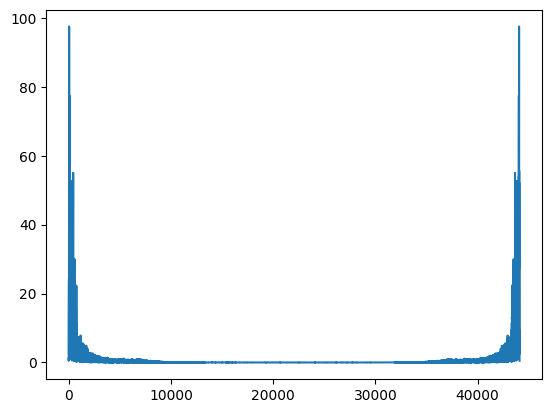

In [8]:
plt.plot(np.abs(fft_data))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

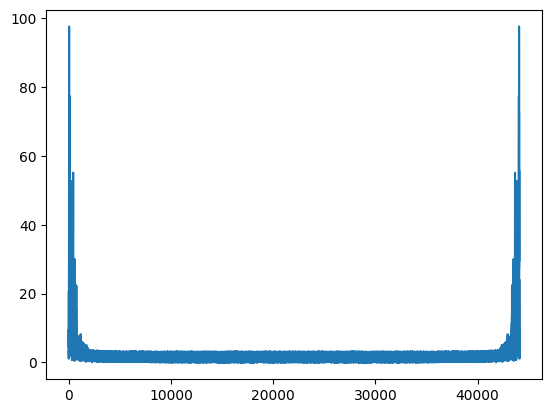

In [9]:
plt.plot(np.abs(fft_data_load))
plt.show